In [1]:
# Lab | Feature extraction

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [3]:
# 1 - Open the categoricals variable we created before.

In [4]:
categoricals = pd.read_csv('categorical.csv')
categoricals.head(5)

,Unnamed: 0,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,policy_number,Year
0,0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize,3,2011
1,1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize,3,2011
2,2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize,3,2011
3,3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize,2,2011
4,4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize,1,2011


In [5]:
categoricals.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
categoricals

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,policy_number,Year
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,1,Agent,Two-Door Car,Medsize,3,2011
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,Agent,Four-Door Car,Medsize,3,2011
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,1,Agent,Two-Door Car,Medsize,3,2011
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,1,Call Center,SUV,Medsize,2,2011
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,Agent,Four-Door Car,Medsize,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,2,Web,Four-Door Car,Medsize,1,2011
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,1,Branch,Four-Door Car,Medsize,3,2011
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,1,Branch,Four-Door Car,Medsize,2,2011
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,3,Branch,Four-Door Car,Large,2,2011


In [6]:
# 2 - Plot all the categorical variables with the proper plot. What can you see?

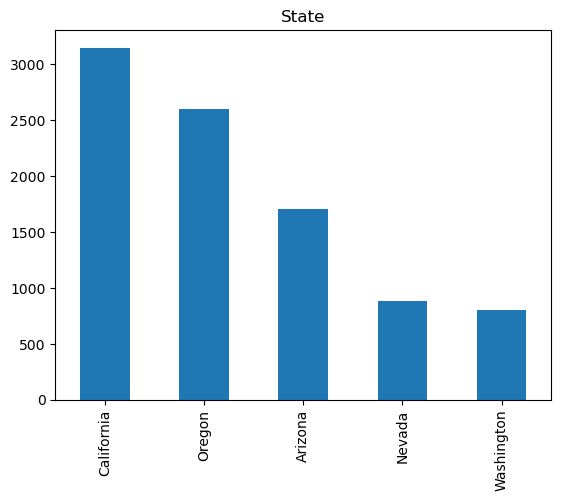

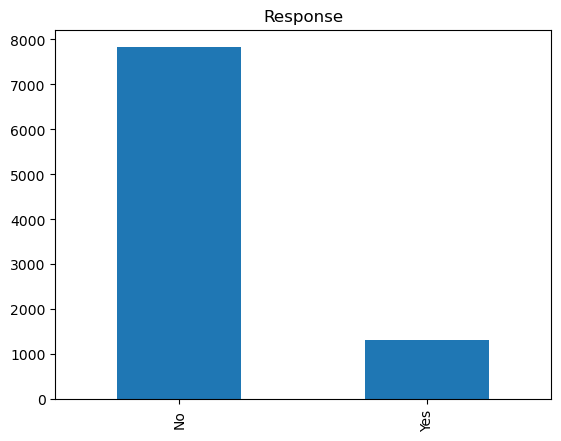

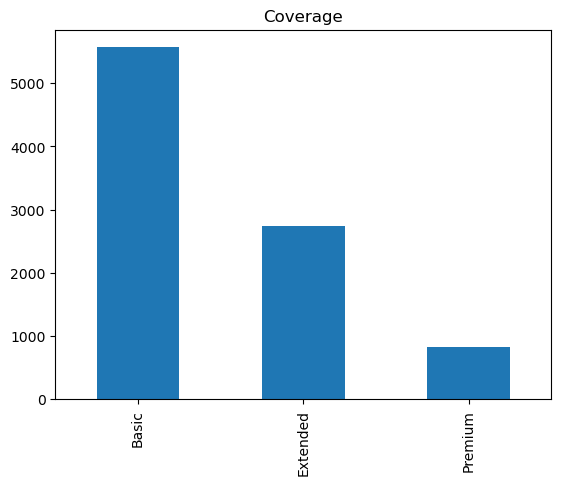

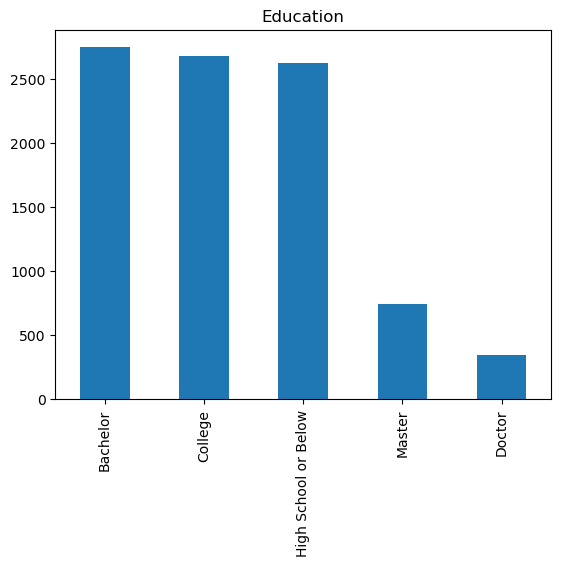

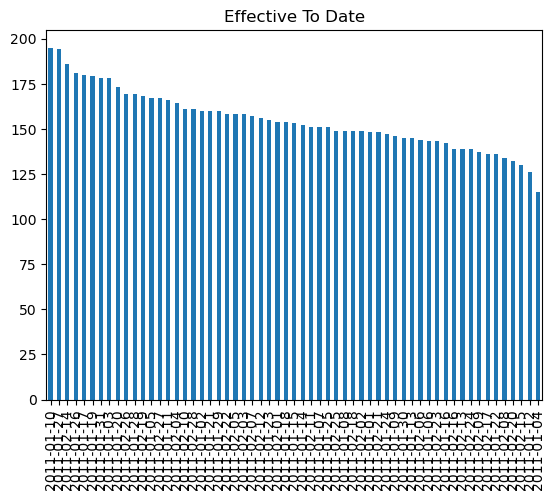

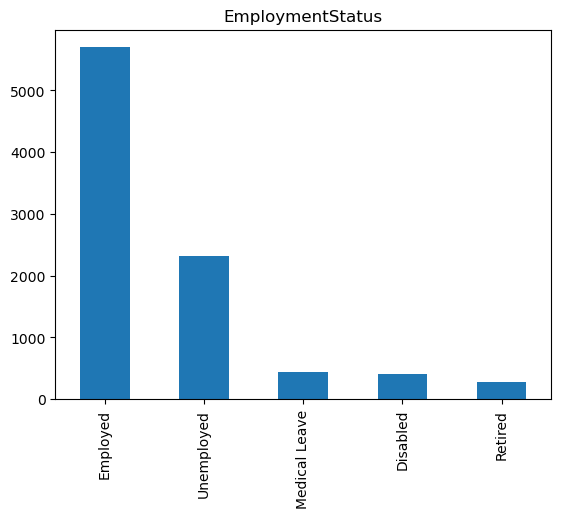

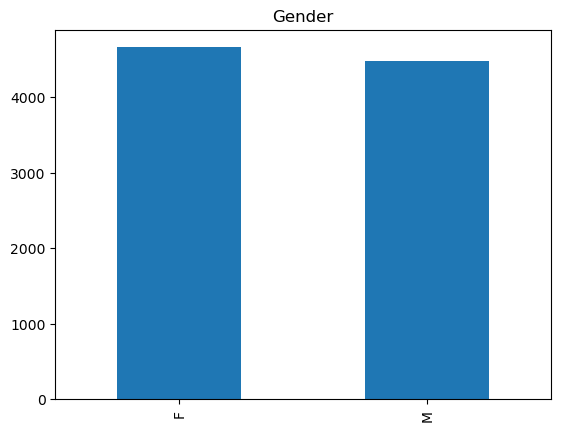

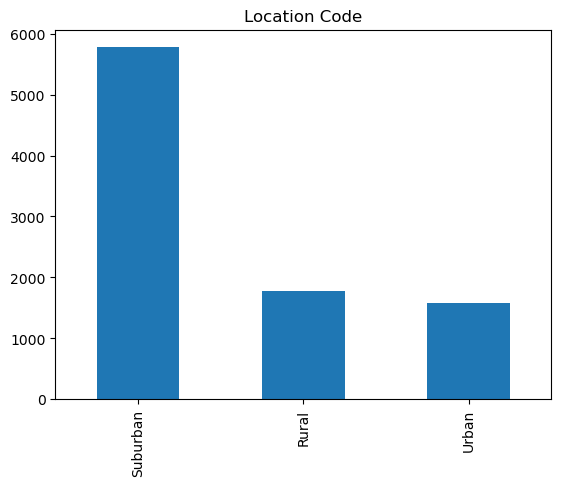

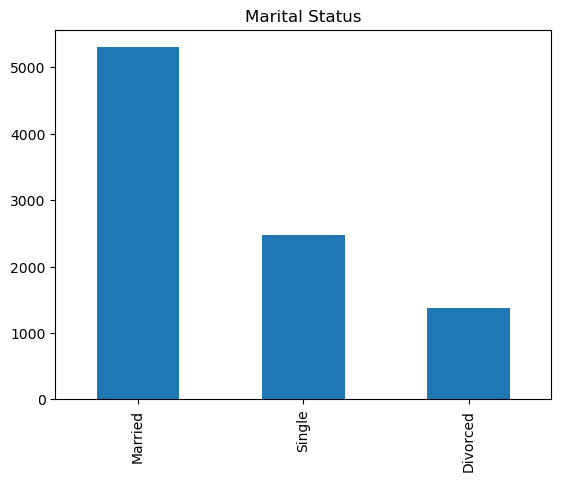

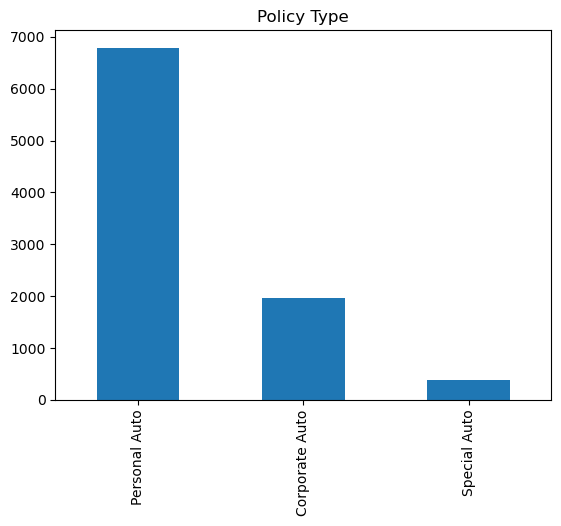

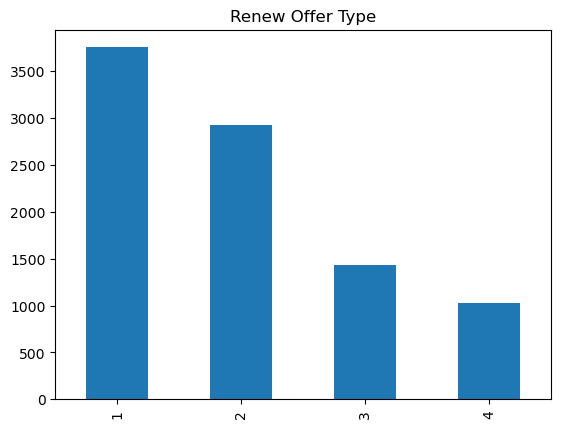

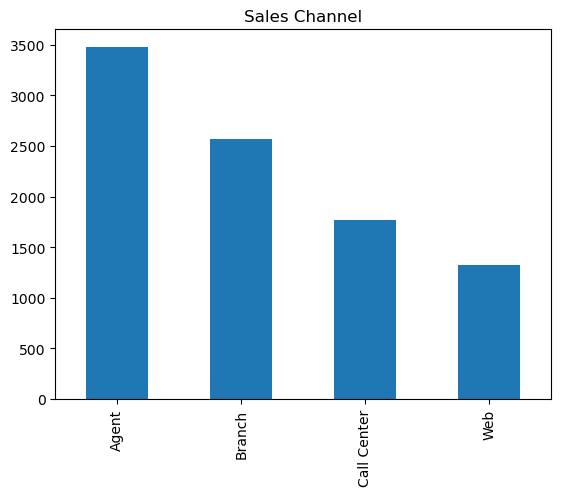

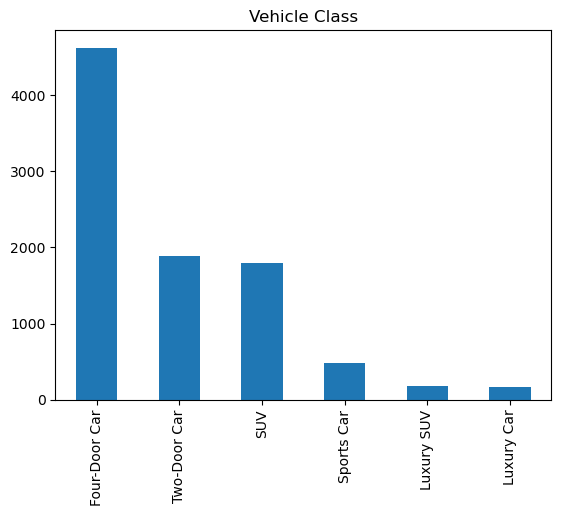

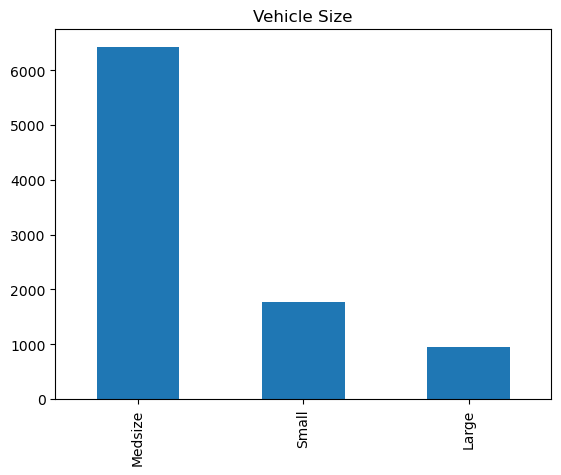

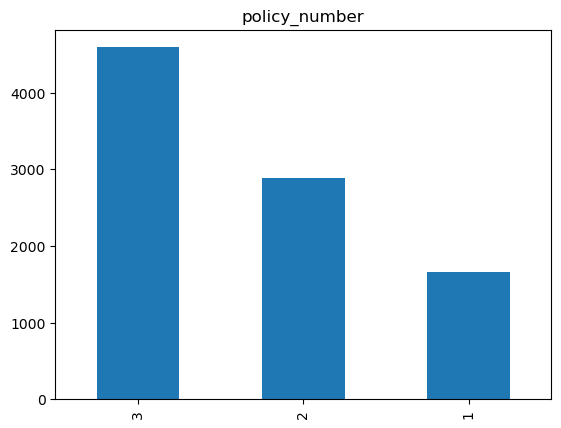

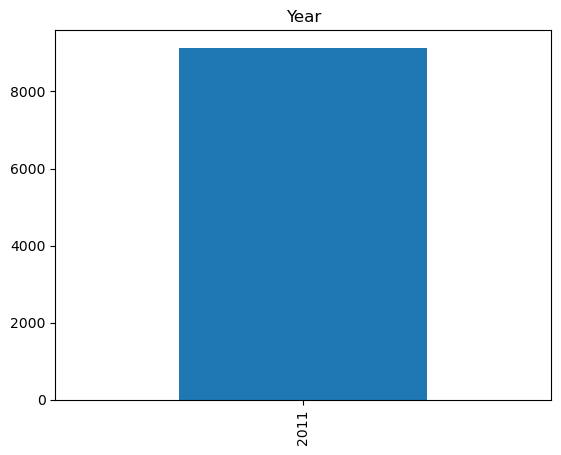

In [7]:
def plot_categorical_variables():
    for c in categoricals:
        plt.figure()
        categoricals[c].value_counts().plot(kind='bar')
        plt.title(c)
        plt.show()
plot_categorical_variables()

#Most of the columns seems to have a very defined and structured data. The column 'effective to date' is the only column
#who represents a lot of unique values that probably are unecessary for our model. We need to approach this column differently.
#The columns 'renew offer type' and 'policy_number' are probably not necessary.

In [8]:
# 3 - There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [9]:
categoricals.drop(columns=["Vehicle Size", 'Year', 'Renew Offer Type'],axis=1,inplace=True)
categoricals

# I decided to delete 'Vehicle Size' because has the same information has Vehicle class, so it becomes redundant.
# The column of the year because it only has one year that's not that much important for our model.
#The column 'Renew Offer Type' has the same information as 'Sales Channel' so the better is to drop as well

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Sales Channel,Vehicle Class,policy_number
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,3
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,3
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,3
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,2
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Web,Four-Door Car,1
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Branch,Four-Door Car,3
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Branch,Four-Door Car,2
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Branch,Four-Door Car,2


In [10]:
# 4 -Plot time variable. Can you extract something from it?

<AxesSubplot:>

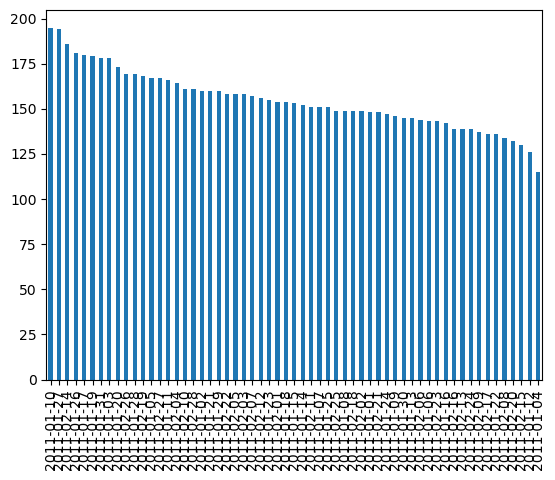

In [11]:
categoricals['Effective To Date'].value_counts().plot(kind='bar')

#It's not possible to extract something from time variable. It has 59 unique values, 
#with the same year. So probably I will delete this column. It will not improve our model.
